In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



h=pd.read_csv("/heart_failure_clinical_records_dataset.csv")
heart=pd.DataFrame(data=h,dtype='float64')
print(h.describe())


              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [10]:
print(h.head())
print(h.shape)

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
print("null values in each column:")
print(heart.isnull().sum())

#inference: there are no null values present

null values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<h1><u><b><i>EXPLORATORY DATA ANALYSIS :</i></b></u></h1>

# 1. Analysing the Death and Living ratio:

no.of living: 203
no.of dead 96


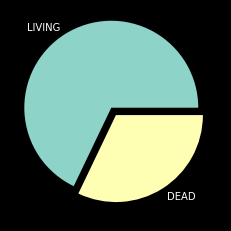

INFERENCE: the *living:dead* ratio is more, therefore an *Imbalanced Dataset* .


In [13]:
plt.style.use("dark_background")
living=len(heart['DEATH_EVENT'][heart.DEATH_EVENT==0])
dead=len(heart['DEATH_EVENT'][heart.DEATH_EVENT==1])
print("no.of living:", living)
print("no.of dead", dead)

arr=np.array([living,dead])
plt.pie(arr,labels=['LIVING','DEAD'],explode=[0.1,0.0])
plt.show()

print("INFERENCE: the *living:dead* ratio is more, therefore an *Imbalanced Dataset* .")

# 2. Distribution of Age :

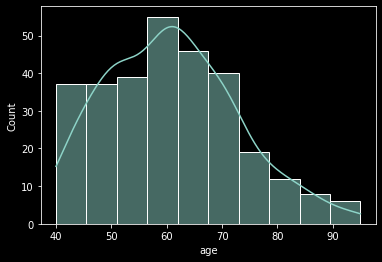

INFERENCE: The people between the ages 50 and 70 contribute the most to the death ratio.


In [12]:

sns.histplot(heart.age,kde=True)
plt.show()

print("INFERENCE: The people between the ages 50 and 70 contribute the most to the death ratio.")

# 3. Comparison of the death ratio of age>=50 and the original died cases :

living case:  167
dead case:  85


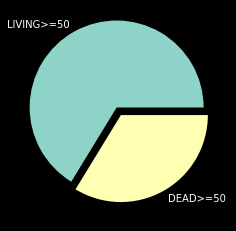

death cases above age 50:  85
overall death cases:  96
INFERENCE: The no. of dead cases here is highly comparable with the original dead cases.


In [14]:
living50=len(heart["DEATH_EVENT"][heart.age>=50][heart.DEATH_EVENT==0])   #the living case
dead50=len(heart["DEATH_EVENT"][heart.age>=50][heart.DEATH_EVENT==1])   #the dead case
print("living case: ", living50)
print("dead case: ", dead50)

arr=np.array([living50,dead50])
plt.pie(arr,labels=['LIVING>=50','DEAD>=50'],explode=[0.1,0.0])
plt.show()

print("death cases above age 50: ",dead50)
print("overall death cases: ",len(heart['DEATH_EVENT'][heart.DEATH_EVENT==1]))
print("INFERENCE: The no. of dead cases here is highly comparable with the original dead cases.")

# <i><u>Visualization using Heatmap :<u></i>

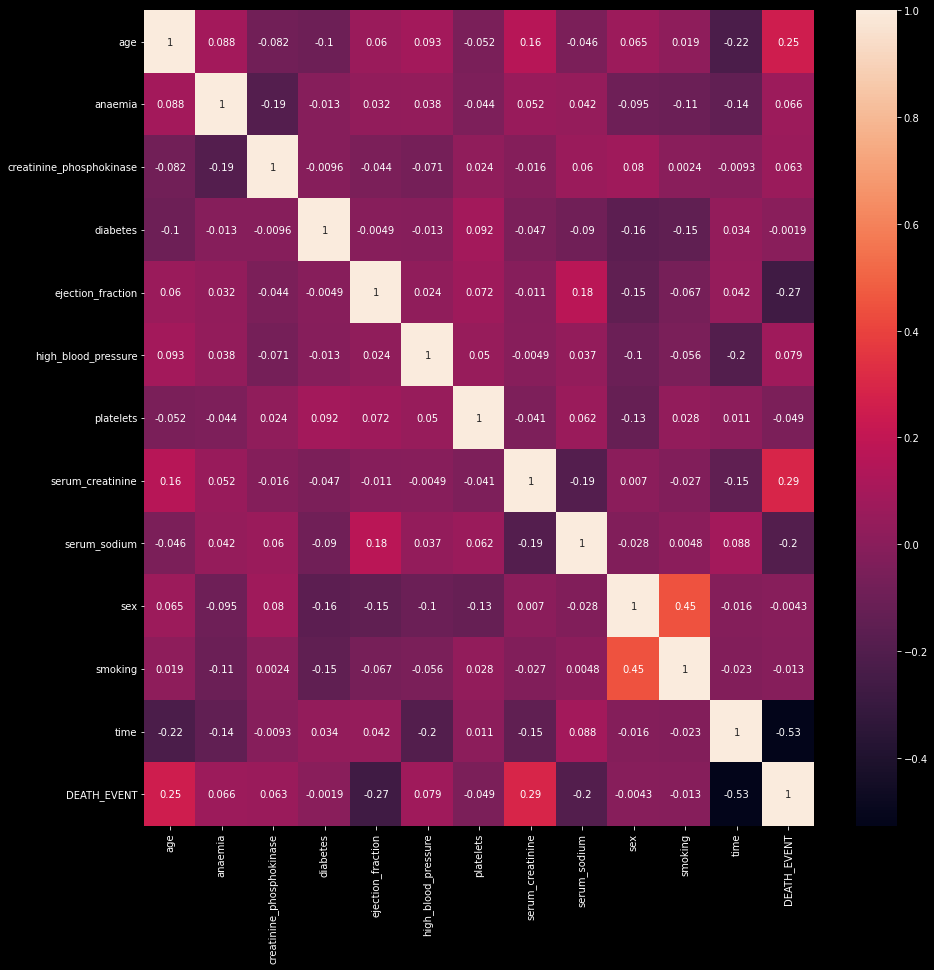

In [15]:
corr=heart.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

# <u><i>Evaluation Metrics :</i></u>

In [16]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score
def evaluationmetrics(y_test,y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred)) 
    print("Precision Score: ", precision_score(y_test, y_pred)) 
    print("Recall Score: ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    return 

<h1><u><b><i> Different Machine Learning Models and their performances : </i></b></u></h1>

In [17]:
x=heart.drop(columns="DEATH_EVENT")
y=heart["DEATH_EVENT"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40)


# 1.Logistic Regression :

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

p=make_pipeline(MinMaxScaler(),LogisticRegression())
p.fit(x_train,y_train)
p1=p.predict(x_test)
evaluationmetrics(y_test,p1)

Accuracy Score:  0.8666666666666667
Precision Score:  1.0
Recall Score:  0.6296296296296297
Confusion Matrix: 
 [[48  0]
 [10 17]]


In [24]:
from sklearn.linear_model import LogisticRegression
# print(x_train.head)

l=LogisticRegression().fit(x_train,y_train)
y2=l.predict(x_test)
evaluationmetrics(y_test,y2)


Accuracy Score:  0.84
Precision Score:  0.8571428571428571
Recall Score:  0.6666666666666666
Confusion Matrix: 
 [[45  3]
 [ 9 18]]


# 2. Support Vector Machines :

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def bestmodel():
    arr={'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    
    g=GridSearchCV(SVC(),arr,refit=True,verbose=3)
    g.fit(x_train,y_train)
    return g.best_estimator_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=1, gamma=0.0001)

In [ ]:
from sklearn.svm import SVC

s1=bestmodel()
y2=s1.predict(x_test)
evaluationmetrics(y_test,y2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

# 3. Gradient Boosting Algorithm :

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

g=GradientBoostingClassifier().fit(x_train,y_train)
y1=g.predict(x_test)
evaluationmetrics(y_test,y1)


Accuracy Score:  0.84
Precision Score:  0.7272727272727273
Recall Score:  0.8888888888888888
Confusion Matrix: 
 [[39  9]
 [ 3 24]]


# 4. XGBoost Algorithm :

In [26]:
import xgboost as xgb

x=xgb.XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0).fit(x_train,y_train)
 
y1=x.predict(x_test)
evaluationmetrics(y_test,y1)

Accuracy Score:  0.8666666666666667
Precision Score:  0.7931034482758621
Recall Score:  0.8518518518518519
Confusion Matrix: 
 [[42  6]
 [ 4 23]]


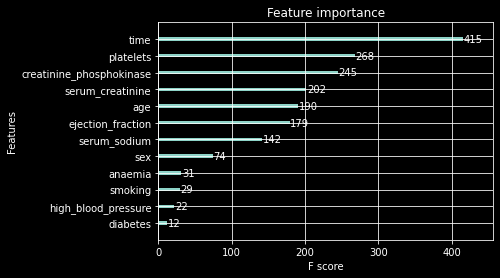

In [27]:
from xgboost import plot_importance

plot_importance(x)
plt.show()

<h1><b><u><i> Saving the Best Model : </i></u></b></h1>

In [30]:
import joblib
joblib.dump(x,"heartmodel.pkl")
print("stored successfully :)")

stored successfully :)


<h1><b><u><i> Using the best model : </i></u></b></h1>

In [31]:
best=joblib.load("heartmodel.pkl")
y2=best.predict(x_test)
evaluationmetrics(y_test,y2)

Accuracy Score:  0.8666666666666667
Precision Score:  0.7931034482758621
Recall Score:  0.8518518518518519
Confusion Matrix: 
 [[42  6]
 [ 4 23]]
